### About Dataset
The Top Instagram Accounts Dataset is a collection of 200 rows of data that provides valuable insights into the most popular Instagram accounts across different categories. The dataset contains several columns that provide comprehensive information on each account's performance, engagement rate, and audience size.

##### 1. The "rank": column lists the accounts in order of their popularity on Instagram, starting from the most followed account.

##### 2. The "name": column displays the Instagram handle of the account, which can be used to locate and follow the account on Instagram.

##### 3. The "channel_info": column provides a brief description of the account, such as the type of content it features or the products and services it offers.

##### 4. The "Category": column categorizes the account based on its primary theme or subject matter, such as fashion, sports, entertainment, or food.

##### 5. The "posts": column displays the total number of posts on the account. This column helps to understand the account's level of activity and the amount of content it has produced over time.

##### 6. The "followers": column indicates the number of people who follow the account on Instagram.

##### 7. The "avg likes": column displays the average number of likes that the account's posts receive per post.

##### 8. The "eng rate": column calculates the account's engagement rate by dividing the total number of likes and comments received by the total number of followers, expressed as a percentage.

### How you can use this Dataset?
The Top Instagram Accounts Dataset can be used in a variety of ways to gain insights into the performance and engagement levels of popular Instagram accounts. Here are a few examples of what you can do with this dataset:

##### 1. Conduct category analysis: The dataset provides information on the category of each Instagram account. You can use this information to conduct a category analysis and identify the most popular categories on Instagram.

##### 2. Identify top influencers: The dataset ranks Instagram accounts based on their follower count. You can use this information to identify the top influencers in different categories and use them for influencer marketing campaigns.

##### 3. Analyze engagement levels: The dataset includes columns such as "avg likes" and "eng rate" that provide insights into the engagement levels of Instagram accounts. You can use this information to understand what type of content resonates with Instagram users and create more engaging content for your own account.

In [162]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re

In [163]:
instagram_data = pd.read_csv('./data.csv')

In [164]:
instagram_data.head()

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.1%
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.4%
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.7%
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.7%
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.1%


In [165]:
instagram_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          200 non-null    int64 
 1   name          200 non-null    object
 2   channel_Info  195 non-null    object
 3   Category      193 non-null    object
 4   Posts         200 non-null    object
 5   Followers     200 non-null    object
 6   Avg. Likes    200 non-null    object
 7   Eng Rate      200 non-null    object
dtypes: int64(1), object(7)
memory usage: 12.6+ KB


In [166]:
channel_category = pd.DataFrame()
channel_category['Category'] = instagram_data['Category']

In [167]:
channel_category.drop_duplicates(keep='first', inplace=True)

In [168]:
channel_category.reset_index(inplace=True)

In [169]:
channel_category.drop(columns='index', inplace=True)

In [170]:
channel_category.sort_values('Category', ascending=True, inplace=True)

In [171]:
channel_category['id_category'] = '1_' + channel_category['Category'].str.lower().replace(r'[& /,]', r'', regex=True)
channel_category

,Category,id_category
8,Beauty & Makeup,1_beautymakeup
11,Craft/DIY,1_craftdiy
9,Finance,1_finance
1,"Health, Sports & Fitness",1_healthsportsfitness
7,Lifestyle,1_lifestyle
6,News & Politics,1_newspolitics
2,entertainment,1_entertainment
5,fashion,1_fashion
10,food,1_food
0,photography,1_photography


In [172]:
channel_category.to_excel('instagram_data_model.xlsx', sheet_name='channel_category', index=False)

In [173]:
with pd.ExcelWriter(
    "instagram_data_model.xlsx",
    engine="openpyxl",
    mode="a",
) as writer:
    instagram_data.to_excel(writer, sheet_name="raw_data", index=False)  

In [174]:
instagram_data.isna().sum()

rank            0
name            0
channel_Info    5
Category        7
Posts           0
Followers       0
Avg. Likes      0
Eng Rate        0
dtype: int64

In [175]:
instagram_data[ (instagram_data['channel_Info'].isna()) | (instagram_data['Category'].isna())]

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate
14,15,virat.kohli,male,NaN,1.5K,228M,1.48K,1.2%
15,16,kendalljenner,male,NaN,731,223.4M,731,2.3%
19,20,kendalljenner,male,NaN,824,204.4M,824,2.5%
21,22,natgeo,male,NaN,26K,196.1M,26.02K,0.1%
104,105,michelleobama,NaN,Finance,691,51.9M,691,0.8%
118,119,jungkook.97,NaN,NaN,87,49.2M,87,15.2%
147,148,uarmyhope,NaN,fashion,171,42.2M,171,18.5%
150,151,jin,male,NaN,100,42.1M,100,23%
158,159,agustd,NaN,NaN,83,41.2M,83,25.3%
177,178,tyga,NaN,entertainment,27,37.7M,27,1.7%


##### Are there users with same name ?


In [176]:
instagram_data[instagram_data.duplicated(subset=['name'])]

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate
19,20,kendalljenner,male,NaN,824,204.4M,824,2.5%
21,22,natgeo,male,NaN,26K,196.1M,26.02K,0.1%


In [177]:
instagram_data.channel_Info.unique()

array(['brand', 'male', 'female', 'community', nan], dtype=object)

##### Does channel type have influence on Engagement %??

In [178]:
#instagram_data.groupby('channel_Info').agg(avg_eng= ('Eng Rate', 'mean')) 

### Formating eng rate to int

instagram_data['eng_rate_%'] = instagram_data['Eng Rate'].str.replace(r'%', r'', regex=True)

In [179]:
instagram_data['eng_rate_%'] = pd.to_numeric(instagram_data['eng_rate_%'])

In [180]:
instagram_data

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate,eng_rate_%
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.1%,0.1
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.4%,1.4
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.7%,1.7
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.7%,1.7
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.1%,1.1
...,...,...,...,...,...,...,...,...,...
195,196,fcbayern,male,"Health, Sports & Fitness",16.8K,35.4M,16.78K,0.6%,0.6
196,197,colesprouse,male,entertainment,1.1K,35.3M,1.14K,3.5%,3.5
197,198,shaymitchell,male,entertainment,6.3K,35.1M,6.31K,1.2%,1.2
198,199,ivetesangalo,female,entertainment,7.8K,35M,7.77K,0.4%,0.4


In [181]:
instagram_data.groupby('channel_Info').agg(avg_eng= ('eng_rate_%', 'mean')).sort_values('avg_eng', ascending=False)

,avg_eng
channel_Info,
male,2.737634
female,2.486486
community,0.592308
brand,0.180000


In [182]:
instagram_data.groupby('channel_Info').agg(no_of_influencers= ('channel_Info', 'count')).sort_values('no_of_influencers', ascending=False)

,no_of_influencers
channel_Info,
male,93
female,74
brand,15
community,13


##### Who are the best male and female influencers?

In [183]:
insta_by_gender = instagram_data[ (instagram_data['channel_Info'] == 'male') | (instagram_data['channel_Info'] == 'female') ]

In [184]:
insta_by_gender[insta_by_gender['eng_rate_%'] >= insta_by_gender['eng_rate_%'].mean()]

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate,eng_rate_%
24,25,zendaya,female,entertainment,3.5K,161.8M,3.54K,4.1%,4.1
28,29,badgalriri,female,entertainment,4.9K,139.2M,4.86K,2.7%,2.7
35,36,billieeilish,female,entertainment,737,107.4M,737,5.9%,5.9
39,40,k.mbappe,male,"Health, Sports & Fitness",1.2K,87.2M,1.20K,3.4%,3.4
41,42,lalalalisa_m,female,entertainment,0.9K,85.5M,0.93K,8.1%,8.1
44,45,khaby00,male,entertainment,317,80.2M,317,8.1%,8.1
48,49,gigihadid,female,fashion,3.3K,76.4M,3.29K,3.4%,3.4
54,55,jennierubyjane,female,entertainment,0.9K,72.4M,0.93K,8.7%,8.7
55,56,shawnmendes,male,entertainment,2.5K,71M,2.55K,3.1%,3.1
56,57,narendramodi,male,News & Politics,559,70.9M,559,3.3%,3.3


In [185]:
insta_by_gender[insta_by_gender['channel_Info'] == 'female'].sort_values('eng_rate_%', ascending=False).head()

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate,eng_rate_%
129,130,j.m,female,entertainment,31,46.5M,31,26.6%,26.6
54,55,jennierubyjane,female,entertainment,0.9K,72.4M,0.93K,8.7%,8.7
67,68,roses_are_rosie,female,entertainment,879,65.2M,879,8.3%,8.3
41,42,lalalalisa_m,female,entertainment,0.9K,85.5M,0.93K,8.1%,8.1
64,65,sooyaaa__,female,entertainment,0.9K,66.6M,0.92K,8%,8.0


In [186]:
insta_by_gender[insta_by_gender['channel_Info'] == 'male'].sort_values('eng_rate_%', ascending=False).head()

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate,eng_rate_%
99,100,thv,male,entertainment,76,53.8M,76,23.9%,23.9
150,151,jin,male,NaN,100,42.1M,100,23%,23.0
164,165,rkive,male,entertainment,120,40.3M,120,15.3%,15.3
165,166,mahi7781,male,"Health, Sports & Fitness",107,40.1M,107,10.9%,10.9
61,62,tomholland2013,male,entertainment,1.2K,67.7M,1.22K,9.9%,9.9


In [187]:
instagram_data[['posts_num','followers_num','avg_likes_num']] = instagram_data[['Posts','Followers','Avg. Likes']].replace({'K':'*1e3', 'M' : '*1e6'}, regex=True)

In [188]:
instagram_data['posts_num'] = instagram_data['posts_num'].map(pd.eval).astype(int)
instagram_data['followers_num'] = instagram_data['followers_num'].map(pd.eval).astype(int)
instagram_data['avg_likes_num'] = instagram_data['avg_likes_num'].map(pd.eval).astype(int)

In [189]:
instagram_data

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate,eng_rate_%,posts_num,followers_num,avg_likes_num
0,1,instagram,brand,photography,7.3K,580.1M,7.31K,0.1%,0.1,7300,580100000,7310
1,2,cristiano,male,"Health, Sports & Fitness",3.4K,519.9M,3.41K,1.4%,1.4,3400,519900000,3410
2,3,leomessi,male,"Health, Sports & Fitness",1K,403.7M,0.97K,1.7%,1.7,1000,403700000,970
3,4,kyliejenner,female,entertainment,7K,375.9M,7.02K,1.7%,1.7,7000,375900000,7020
4,5,selenagomez,female,entertainment,1.8K,365.3M,1.85K,1.1%,1.1,1800,365300000,1850
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,fcbayern,male,"Health, Sports & Fitness",16.8K,35.4M,16.78K,0.6%,0.6,16800,35400000,16780
196,197,colesprouse,male,entertainment,1.1K,35.3M,1.14K,3.5%,3.5,1100,35300000,1140
197,198,shaymitchell,male,entertainment,6.3K,35.1M,6.31K,1.2%,1.2,6300,35100000,6310
198,199,ivetesangalo,female,entertainment,7.8K,35M,7.77K,0.4%,0.4,7800,35000000,7770


##### More posts = more avg likes per post ?

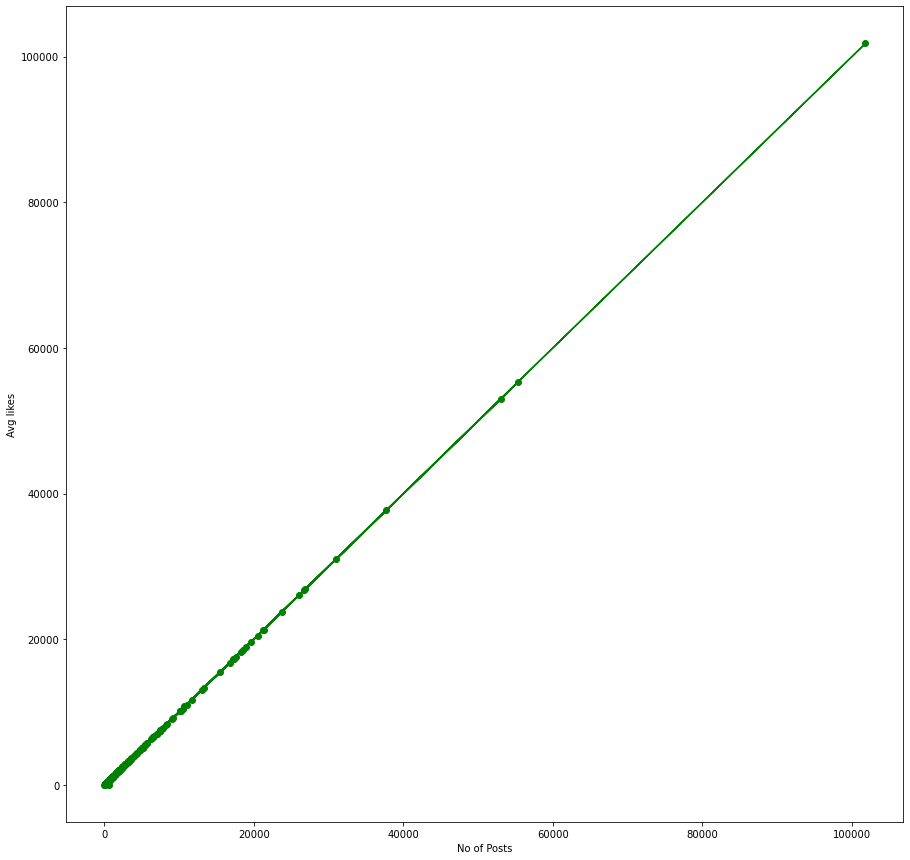

In [190]:
posts_num = instagram_data.posts_num.values
avg_likes_num = instagram_data.avg_likes_num.values
followers_num = instagram_data.followers_num.values/1000

plt.figure( figsize= (15,15))

plt.plot(posts_num, avg_likes_num, color='green', marker='o')

#avg_likes_num = instagram_data.avg_likes_num.values/1000

#plt.scatter(followers_num, avg_likes_num, color='red')

plt.xlabel('No of Posts')
plt.ylabel('Avg likes')

plt.show()

##### How does category influence engagement rate

In [194]:
#instagram_data['channel_Info'].fillna('others')
instagram_data['channel_info_cleaned'] = instagram_data['channel_Info'].fillna('others')
instagram_data['category_cleaned'] = instagram_data['Category'].fillna('others')
instagram_data[instagram_data['Category'].isna()]

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate,eng_rate_%,posts_num,followers_num,avg_likes_num,channel_info_cleaned,category_cleaned
14,15,virat.kohli,male,NaN,1.5K,228M,1.48K,1.2%,1.2,1500,228000000,1480,male,others
15,16,kendalljenner,male,NaN,731,223.4M,731,2.3%,2.3,731,223400000,731,male,others
19,20,kendalljenner,male,NaN,824,204.4M,824,2.5%,2.5,824,204400000,824,male,others
21,22,natgeo,male,NaN,26K,196.1M,26.02K,0.1%,0.1,26000,196100000,26020,male,others
118,119,jungkook.97,NaN,NaN,87,49.2M,87,15.2%,15.2,87,49200000,87,others,others
150,151,jin,male,NaN,100,42.1M,100,23%,23.0,100,42100000,100,male,others
158,159,agustd,NaN,NaN,83,41.2M,83,25.3%,25.3,83,41200000,83,others,others


###### Fashion has the highest engagement rate , with just 10 influencers penetration is high leading to better monetization

In [195]:
instagram_data.groupby('category_cleaned').agg(no_of_influencers = ('rank', 'count'),avg_rate = ('eng_rate_%', 'mean')).sort_values('avg_rate', ascending=False).head()

,no_of_influencers,avg_rate
category_cleaned,,
others,7,9.942857
fashion,10,3.260000
entertainment,129,2.680620
News & Politics,3,1.833333
"Health, Sports & Fitness",39,1.343590


In [199]:
instagram_data.groupby(['category_cleaned', 'channel_info_cleaned']).agg(no_of_influencers = ('channel_info_cleaned', 'count'),avg_rate = ('eng_rate_%', 'mean')).sort_values('avg_rate', ascending=False).head(10)

no_of_influencers   avg_rate
category_cleaned         channel_info_cleaned                              
others                   others                                2  20.250000
fashion                  others                                1  18.500000
others                   male                                  5   5.820000
fashion                  female                                3   4.366667
entertainment            male                                 54   3.170370
                         female                               69   2.473913
News & Politics          male                                  3   1.833333
entertainment            others                                1   1.700000
Health, Sports & Fitness male                                 30   1.590000
food                     male                                  1   1.100000

###### Best influencer in their category 

In [217]:
instagram_data.sort_values('eng_rate_%', ascending=False).groupby(['category_cleaned']).first().sort_values(['category_cleaned','eng_rate_%'], ascending=False)

,rank,name,channel_Info,Category,Posts,Followers,Avg. Likes,Eng Rate,eng_rate_%,posts_num,followers_num,avg_likes_num,channel_info_cleaned
category_cleaned,,,,,,,,,,,,,
technology,41,nasa,community,technology,3.7K,85.8M,3.69K,1.1%,1.1,3700,85800000,3690,community
photography,134,natgeotravel,brand,photography,17.2K,46M,17.24K,0.2%,0.2,17200,46000000,17240,brand
others,159,agustd,male,None,83,41.2M,83,25.3%,25.3,83,41200000,83,others
food,115,nusr_et,male,food,2.4K,49.9M,2.40K,1.1%,1.1,2400,49900000,2400,male
fashion,148,uarmyhope,female,fashion,171,42.2M,171,18.5%,18.5,171,42200000,171,others
entertainment,130,j.m,female,entertainment,31,46.5M,31,26.6%,26.6,31,46500000,31,female
News & Politics,57,narendramodi,male,News & Politics,559,70.9M,559,3.3%,3.3,559,70900000,559,male
Lifestyle,83,9gag,community,Lifestyle,31K,58.1M,31.04K,0.5%,0.5,31000,58100000,31040,community
"Health, Sports & Fitness",166,mahi7781,male,"Health, Sports & Fitness",107,40.1M,107,10.9%,10.9,107,40100000,107,male
